In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier,RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from xgboost import plot_importance
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print(train.shape)
train.head()

(61878, 95)


,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [4]:
train.columns

Index(['id', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6',
       'feat_7', 'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12',
       'feat_13', 'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18',
       'feat_19', 'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24',
       'feat_25', 'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_30',
       'feat_31', 'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36',
       'feat_37', 'feat_38', 'feat_39', 'feat_40', 'feat_41', 'feat_42',
       'feat_43', 'feat_44', 'feat_45', 'feat_46', 'feat_47', 'feat_48',
       'feat_49', 'feat_50', 'feat_51', 'feat_52', 'feat_53', 'feat_54',
       'feat_55', 'feat_56', 'feat_57', 'feat_58', 'feat_59', 'feat_60',
       'feat_61', 'feat_62', 'feat_63', 'feat_64', 'feat_65', 'feat_66',
       'feat_67', 'feat_68', 'feat_69', 'feat_70', 'feat_71', 'feat_72',
       'feat_73', 'feat_74', 'feat_75', 'feat_76', 'feat_77', 'feat_78',
       'feat_79', 'feat_80', 'feat_81', 'feat_82', 'fe

<AxesSubplot:xlabel='target', ylabel='count'>

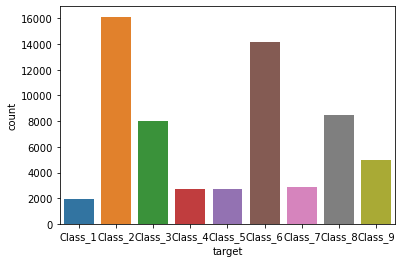

In [5]:
sns.countplot(train.target)

In [6]:
train.isnull().sum().sum()
# 데이터에 결측치는 확인할 수 없다.

0

In [7]:
train.drop('id', axis = 1, inplace = True)
print(train.shape)

(61878, 94)


In [8]:
le =LabelEncoder()
train['target']=le.fit_transform(train['target'])

In [9]:
target=train['target']
train.drop(columns = 'target' ,axis = 1, inplace = True)

<AxesSubplot:xlabel='target', ylabel='feat_73'>

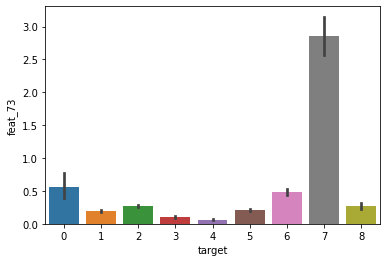

In [10]:
sns.barplot(data = train, y = 'feat_73', x = target)

<AxesSubplot:xlabel='target', ylabel='feat_74'>

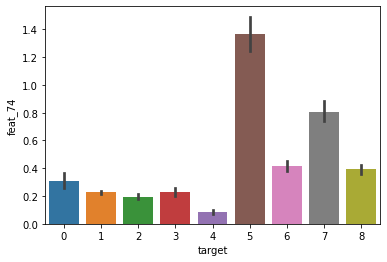

In [11]:
sns.barplot( y =train.feat_74, x = target)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.2, random_state = 42)
print('X_train의 형태' , X_train.shape)
print('X_test의 형태' , X_test.shape)
print('y_train의 형태' , y_train.shape)
print('y_test의 형태' , y_test.shape)

X_train의 형태 (49502, 93)
X_test의 형태 (12376, 93)
y_train의 형태 (49502,)
y_test의 형태 (12376,)


In [13]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
print('accracy : {:.2f}'.format(knn.score(X_test, y_test)))

accracy : 0.78


In [14]:
# AdaBoostClassifier
# model = AdaBoostClassifier()
# model.fit(X_train, y_train)
# y_pred=model.predict(X_test)
# np.mean(y_test == y_pred)

- 우리는 이 수치보다 높게 만드는것을 목표로 한다.

In [15]:
clf = RandomForestClassifier(n_estimators = 300, criterion = 'gini', max_depth=100, random_state = 10)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
np.mean(y_test == y_pred)

0.8123787976729153

In [16]:
# gbc=GradientBoostingClassifier()
# gbc.fit(X_train, y_train)
# y_pred = gbc.predict(X_test)
# np.mean(y_test == y_pred)

In [17]:
train=pd.concat([train, target], axis = 1)

In [18]:
print(train.shape)
train.head()

(61878, 94)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,6,1,5,0,0,1,...,0,1,2,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [19]:
# 1~10
train.iloc[:,:10].describe()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10
count,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,0.263906
std,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,1.083340
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,30.000000


In [20]:
# 10~20
train.iloc[:,10:20].describe()

,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20
count,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,1.252869,0.140874,0.480979,1.696693,1.284398,1.413459,0.366108,0.575423,0.551699,0.471525
std,3.042333,0.567089,2.014697,3.163212,3.862236,2.226163,1.477436,1.335985,4.636145,1.438727
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,2.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000
max,38.000000,30.000000,72.000000,33.000000,46.000000,37.000000,43.000000,32.000000,121.000000,27.000000


In [21]:
# 20~30
train.iloc[:,20:30].describe()

,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30
count,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,0.204014,0.729969,0.142522,2.643880,1.534520,0.563108,0.696613,0.238970,0.275768,0.150312
std,0.696050,1.446220,0.782979,4.629015,2.332994,1.710305,2.873222,0.828112,1.901294,1.640880
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,14.000000,22.000000,64.000000,263.000000,30.000000,33.000000,123.000000,22.000000,69.000000,87.000000


In [22]:
# 30~40
train.iloc[:,30:40].describe()

,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40
count,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,0.148680,1.043796,0.696516,0.946411,0.666263,0.709089,0.263632,0.582129,0.485585,1.653059
std,0.897354,2.416849,1.310202,3.368622,3.197965,2.555119,0.756934,1.602579,3.298315,3.299798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000
max,59.000000,149.000000,24.000000,84.000000,105.000000,84.000000,22.000000,39.000000,78.000000,41.000000


In [23]:
# 40~50
train.iloc[:,40:50].describe()

,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50
count,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,0.303468,0.698019,0.451146,0.560829,0.238130,0.641375,0.249669,1.584893,0.348314,0.324283
std,1.085672,1.961189,1.706013,1.346090,2.587131,2.348359,1.446203,2.577071,1.369380,1.720470
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,36.000000,41.000000,42.000000,34.000000,80.000000,41.000000,47.000000,49.000000,81.000000,73.000000


In [24]:
# 50~60
train.iloc[:,50:60].describe()

,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60
count,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,0.053298,0.213485,0.442063,2.072465,0.323120,0.303775,0.309108,0.697970,0.388603,1.029930
std,0.513820,1.044788,2.006485,4.113319,0.998743,1.925806,1.082148,3.983722,2.577693,3.028469
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,44.000000,48.000000,53.000000,63.000000,27.000000,62.000000,30.000000,117.000000,97.000000,40.000000


In [25]:
# 60~70
train.iloc[:,60:70].describe()

,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70
count,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,0.239746,1.187563,0.168590,1.256796,0.222228,0.571706,2.897653,0.392902,0.811128,0.892789
std,1.017553,2.666742,0.946158,3.402080,0.783052,1.361874,4.974322,1.761054,4.111091,1.941368
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,4.000000,0.000000,0.000000,1.000000
max,38.000000,56.000000,51.000000,73.000000,38.000000,36.000000,104.000000,109.000000,76.000000,46.000000


In [26]:
# 70~80
train.iloc[:,70:80].describe()

,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80
count,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,0.319290,0.858722,0.591050,0.579851,0.726817,0.748457,0.124196,0.366415,0.300446,0.698067
std,1.162443,2.411646,5.783233,3.757822,3.200095,2.920038,0.906621,2.778317,1.285569,2.245671
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31.000000,30.000000,352.000000,231.000000,80.000000,102.000000,29.000000,80.000000,25.000000,54.000000


In [27]:
# 80~90
train.iloc[:,80:90].describe()

,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90
count,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,0.078461,0.187983,0.496719,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421
std,0.461244,0.836269,2.434921,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,26.000000,24.000000,79.000000,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000


In [28]:
# 90~
train.iloc[:,90:].describe()

,feat_91,feat_92,feat_93,target
count,61878.000000,61878.000000,61878.000000,61878.000000
mean,0.264941,0.380119,0.126135,3.842335
std,2.045646,0.982385,1.201720,2.510794
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,4.000000
75%,0.000000,0.000000,0.000000,6.000000
max,52.000000,19.000000,87.000000,8.000000


In [29]:
def solution(x):
    if x == 0 :
        return 0
    elif x == 1:
        return 0.4
    else:
        return np.log(x)

In [30]:
for i in train.loc[:,:'feat_93'].columns:
    train[i] = train[i].apply(solution)

In [31]:
train

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,0.400000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.4,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0
1,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.400000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0
2,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.400000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0
3,0.400000,0.0,0.0,0.4,1.791759,0.4,1.609438,0.000000,0.0,0.4,...,0.0,0.400000,0.693147,0.0,0.000000,0.0,0.000000,0.000000,0.0,0
4,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.4,0.000000,0.000000,0.0,0.000000,0.4,0.000000,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61873,0.400000,0.0,0.0,0.4,0.400000,0.0,0.000000,0.000000,0.0,0.0,...,0.4,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.693147,0.0,8
61874,1.386294,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.693147,0.000000,0.0,0.693147,0.0,0.000000,0.400000,0.0,8
61875,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,1.098612,0.4,0.0,...,0.0,1.098612,0.400000,0.0,0.000000,0.0,0.000000,0.000000,0.0,8
61876,0.400000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.400000,0.0,1.098612,2.302585,0.0,8


In [32]:
train.drop('target', axis = 1,inplace = True)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.2, random_state = 42)

In [34]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(np.mean(y_pred == y_test))

[18:52:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8160148674854557


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

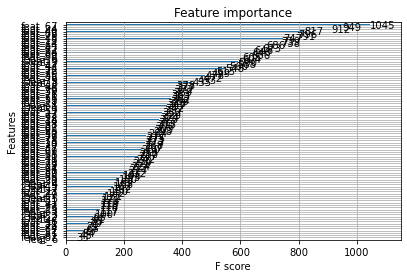

<Figure size 1152x2160 with 0 Axes>

In [35]:
fig, ax = plt.subplots()
plt.figure(figsize = (16,30))
plot_importance(xgb, ax=ax)

In [36]:
clf = RandomForestClassifier(n_estimators = 300, criterion = 'gini', max_depth=100, random_state = 10)
clfbag = BaggingClassifier(clf, n_estimators = 5)
clfbag.fit(X_train, y_train)
y_pred=clfbag.predict(X_test)
np.mean(y_test == y_pred)

0.8070458952811894

In [37]:
# knn
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)
print('accracy : {:.2f}'.format(knn.score(X_test, y_test)))

accracy : 0.79


In [38]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
np.mean(y_test == y_pred)

0.78409825468649

## test

In [39]:
a=pd.read_csv('sampleSubmission.csv')
a.iloc[:,0]

0              0
1              1
2              2
3              3
4              4
           ...  
144363    144363
144364    144364
144365    144365
144366    144366
144367    144367
Name: Unnamed: 0, Length: 144368, dtype: int64

In [40]:
test.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,1,2,0,...,0,0,0,0,0,0,0,9,0,0


In [41]:
id = test.id

In [42]:
test.drop('id', axis = 1, inplace = True)

In [43]:
for i in test.columns:
    test[i] = test[i].apply(solution)

In [ ]:
test_csv=pd.get_dummies(test_target)
test_csv.rename(columns = {0:'Class_1', 1: 'Class_2', 2:'Class_3', 3:'Class_4', 4:'Class_5', 5: 'Class_6', 6: 'Class_7', 7:'Class_8', 8: 'Class_9'}, inplace = True)
test_csv=pd.concat([a,id, test_csv], axis = 1)

In [ ]:
test_csv

In [ ]:
test_csv.to_csv('C:/Users/lg/캐글데이터분석/월요일까지/sampleSubmission.csv')